170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


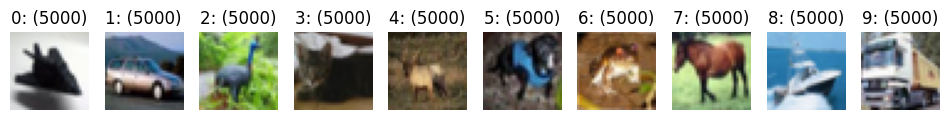

(10000, 32, 32, 3)
(10000, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 - 11s - 34ms/step - accuracy: 0.1368 - loss: 2.2910 - val_accuracy: 0.1834 - val_loss: 2.2738
Epoch 2/10
313/313 - 14s - 46ms/step - accuracy: 0.1826 - loss: 2.2598 - val_accuracy: 0.1837 - val_loss: 2.2479
Epoch 3/10
313/313 - 10s - 33ms/step - accuracy: 0.2121 - loss: 2.2289 - val_accuracy: 0.2047 - val_loss: 2.2155
Epoch 4/10
313/313 - 9s - 30ms/step - accuracy: 0.2336 - loss: 2.1939 - val_accuracy: 0.2267 - val_loss: 2.1760
Epoch 5/10
313/313 - 10s - 33ms/step - accuracy: 0.2509 - loss: 2.1567 - val_accuracy: 0.2804 - val_loss: 2.1380
Epoch 6/10
313/313 - 7s - 23ms/step - accuracy: 0.2655 - loss: 2.1202 - val_accuracy: 0.2422 - val_loss: 2.1081
Epoch 7/10
313/313 - 10s - 33ms/step - accuracy: 0.2707 - loss: 2.0870 - val_accuracy: 0.2641 - val_loss: 2.0744
Epoch 8/10
313/313 - 11s - 37ms/step - accuracy: 0.2816 - loss: 2.0583 - val_accuracy: 0.2852 - val_loss: 2.0487
Epoch 9/10
313/313 - 16s - 52ms/step - accuracy: 0.2886 - loss: 2.0341 - val_accuracy: 0.2958 - va

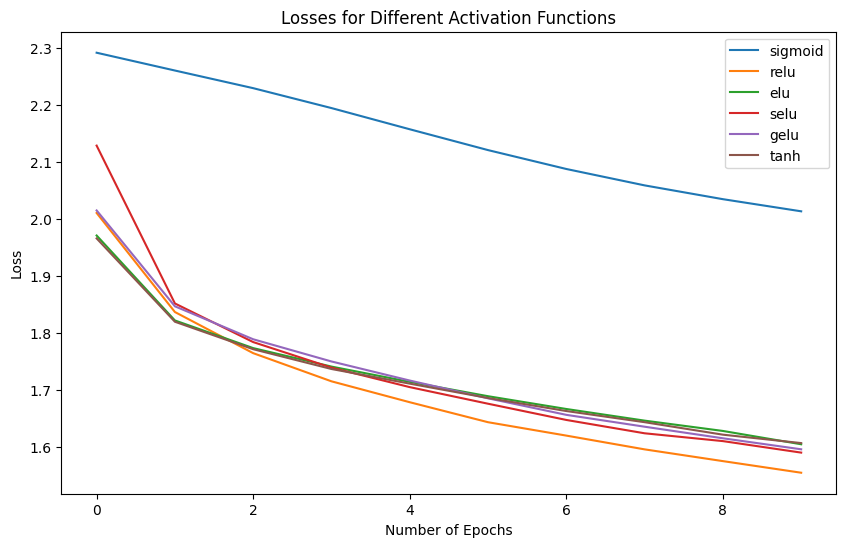

Max weights in sigmoid model layers: [0.0056292247, 0.005125682, 0.006207985]
Max weights in relu model layers: [0.041912314, 0.05104828, 0.11491397]
Max weights in elu model layers: [0.01978114, 0.013131804, 0.027272653]
Max weights in selu model layers: [0.016197013, 0.01318581, 0.01980341]
Max weights in gelu model layers: [0.016834766, 0.021134237, 0.06747956]
Max weights in tanh model layers: [0.020366134, 0.009422874, 0.02659671]
Number of layers in each model: 3


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.callbacks import Callback
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

# Convert the NumPy array to a flattened list for hashability
unique_labels = set(y_train.flatten())
plt.figure(figsize=(12, 12))

i = 1
for label in unique_labels:
    image = X_train[np.where(y_train.flatten() == label)[0][0]]
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(label, list(y_train.flatten()).count(label)))
    i += 1
    plt.imshow(image)
plt.show()

# Print validation data shapes
print(X_val.shape)
print(y_val.shape)

# Normalize the images to [0, 1] range
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
n_classes = 10
y_train = to_categorical(y_train, num_classes=n_classes)
y_val = to_categorical(y_val, num_classes=n_classes)

# Reshape the data to match the input for Dense layers
X_train = np.reshape(X_train, (50000, 3072))  # 50000 images of size 32x32x3
X_val = np.reshape(X_val, (10000, 3072))      # 10000 images of size 32x32x3

# Define a function to create models with different activation functions
def create_model(activation):
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(3072,)))
    model.add(Dense(512, activation=activation))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

# Create models with different activation functions
activations = ['sigmoid', 'relu', 'elu', 'selu', 'gelu', 'tanh']
models = {}
for activation in activations:
    models[activation] = create_model(activation)

# Custom callback to store loss history
class history_loss(Callback):
    def on_train_begin(self, logs=None):
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

# Training parameters
n_epochs = 10
batch_size = 128
validation_split = 0.2

# Train models and store history
histories = {}
for activation in activations:
    history = history_loss()
    models[activation].fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                           callbacks=[history], validation_split=validation_split, verbose=2)
    histories[activation] = history

# Plot the losses
plt.figure(figsize=(10, 6))
for activation in activations:
    plt.plot(np.arange(len(histories[activation].losses)), histories[activation].losses, label=activation)
plt.title('Losses for Different Activation Functions')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Compare weights of the models
max_weights = {}
for activation in activations:
    max_weights[activation] = []
    for i in range(len(models[activation].layers)):
        max_weights[activation].append(np.max(models[activation].layers[i].get_weights()[1]))

for activation in activations:
    print(f"Max weights in {activation} model layers:", max_weights[activation])

print("Number of layers in each model:", len(models['sigmoid'].layers))